In [1]:
import sklearn as sklearn
from sklearn import tree

from scipy.io import loadmat 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Classification and Decision Trees for the PIMA diabetes dataset

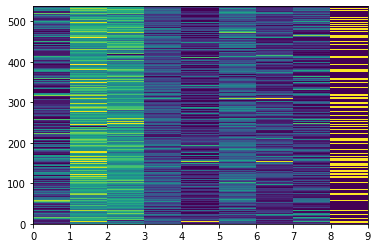

In [2]:
PIMA = loadmat('Pima-Data-Adjusted.mat')
PIMA_data = PIMA['data']
features, variables = PIMA_data.shape
plt.pcolor(PIMA_data)

# Need to split into training and validation data
split = .7 # 70% training/validation split
split_idx = int(np.round(features*split))
x_train = PIMA_data[:split_idx, :-1]
y_train = PIMA_data[:split_idx,-1]
x_test = PIMA_data[split_idx:, :-1]
y_test = PIMA_data[split_idx:,-1]

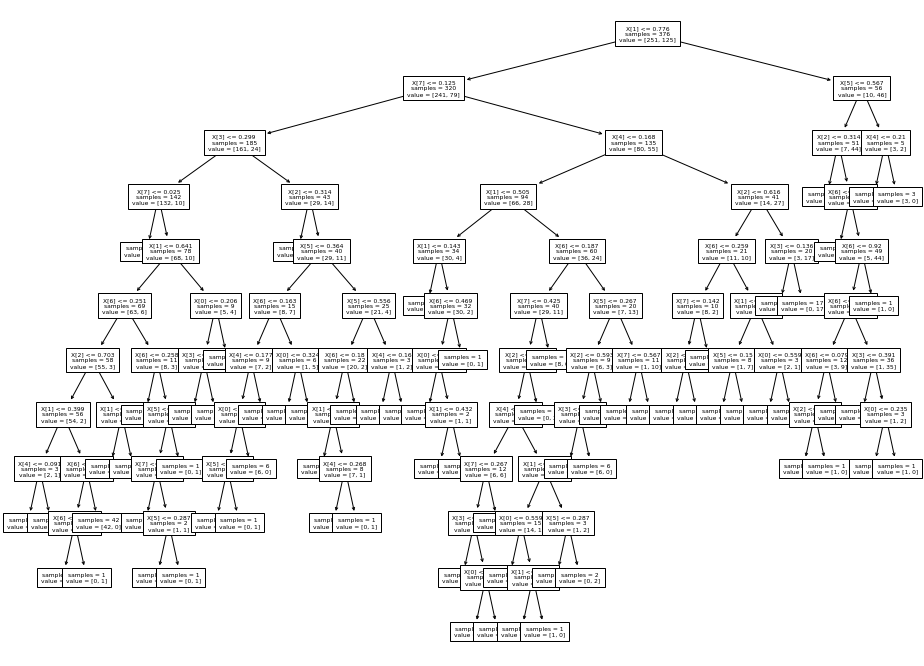

In [3]:
# Now we set up and train the classification tree model, no tuning of hyperparameters yet
clf = sklearn.tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train, )

plt.figure(figsize=(16,12))
plt.savefig('tree_diagram.pdf')
sklearn.tree.plot_tree(clf, fontsize=6, impurity=False);

In [4]:
correct_percent = np.sum(clf.predict(x_test) == y_test) / (features - split_idx)
print('Error percentage in validation: ', (1-correct_percent)*100)

Error percentage in validation:  23.60248447204969


In [5]:
# Now we start to tune the max_depth and min_sample_split in a completely brute-force way
correct_percent = np.zeros((12,12))

for i in range(1,11):
    for j in range(2,12):
        clf_tuned = sklearn.tree.DecisionTreeClassifier(max_depth=i, min_samples_split=j)
        clf_tuned = clf_tuned.fit(x_train, y_train)

        correct_percent[i,j] = np.sum(clf_tuned.predict(x_test) == y_test) / (features - split_idx)
        print('Error percentage for max_depth=', i, ' and min_sample_split=',j, ': ',(1-correct_percent[i,j])*100)

Error percentage for max_depth= 1  and min_sample_split= 2 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 3 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 4 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 5 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 6 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 7 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 8 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 9 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 10 :  22.360248447204967
Error percentage for max_depth= 1  and min_sample_split= 11 :  22.360248447204967
Error percentage for max_depth= 2  and min_sample_split= 2 :  22.981366459627328
Error percentage for max_depth= 2  and min_sample_split= 3 :  22.981366459627328
Error percentage for max_d

## It looks like the simplest classifer that achieves the minimum error has a max depth of 5 and a min sample split of 5. Plotted below is the tree structure...

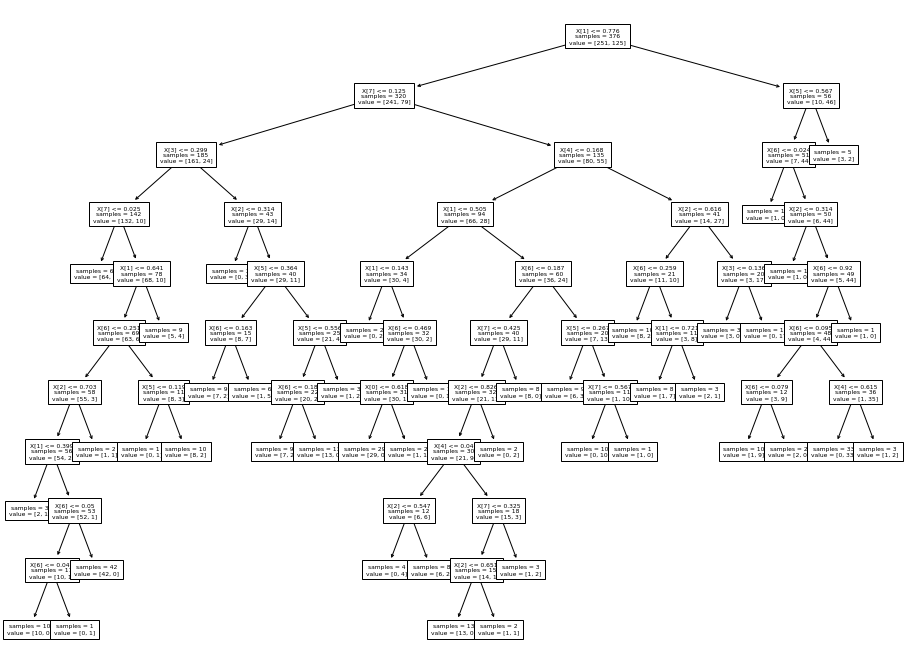

In [6]:
clf_opt = sklearn.tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)
clf_opt = clf_tuned.fit(x_train, y_train)

plt.figure(figsize=(16,12))
sklearn.tree.plot_tree(clf_opt, fontsize=6, impurity=False);

# Random Forest Models

In [8]:
from sklearn import ensemble
tot = 400
correct_percent = np.zeros((tot,))

for i in range(tot):

    rf_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=int(i)+1, max_depth=5, min_samples_split=5)
    rf_clf.fit(x_train, y_train)

    correct_percent[i] = np.sum(rf_clf.predict(x_test) == y_test) / (features - split_idx)
    print('Error percentage in validation: ', (1-correct_percent[i])*100, 'for number of trees: ',int(i)+1)

Error percentage in validation:  24.84472049689441 for number of trees:  1
Error percentage in validation:  21.739130434782606 for number of trees:  2
Error percentage in validation:  26.708074534161486 for number of trees:  3
Error percentage in validation:  24.22360248447205 for number of trees:  4
Error percentage in validation:  18.012422360248447 for number of trees:  5
Error percentage in validation:  20.496894409937894 for number of trees:  6
Error percentage in validation:  20.496894409937894 for number of trees:  7
Error percentage in validation:  18.633540372670808 for number of trees:  8
Error percentage in validation:  20.496894409937894 for number of trees:  9
Error percentage in validation:  16.770186335403725 for number of trees:  10
Error percentage in validation:  21.739130434782606 for number of trees:  11
Error percentage in validation:  18.012422360248447 for number of trees:  12
Error percentage in validation:  18.633540372670808 for number of trees:  13
Error perc

Error percentage in validation:  19.254658385093173 for number of trees:  108
Error percentage in validation:  14.90683229813664 for number of trees:  109
Error percentage in validation:  16.149068322981364 for number of trees:  110
Error percentage in validation:  18.012422360248447 for number of trees:  111
Error percentage in validation:  17.391304347826086 for number of trees:  112
Error percentage in validation:  17.391304347826086 for number of trees:  113
Error percentage in validation:  18.012422360248447 for number of trees:  114
Error percentage in validation:  17.391304347826086 for number of trees:  115
Error percentage in validation:  16.149068322981364 for number of trees:  116
Error percentage in validation:  16.149068322981364 for number of trees:  117
Error percentage in validation:  18.012422360248447 for number of trees:  118
Error percentage in validation:  16.770186335403725 for number of trees:  119
Error percentage in validation:  16.149068322981364 for number of

Error percentage in validation:  16.770186335403725 for number of trees:  214
Error percentage in validation:  18.012422360248447 for number of trees:  215
Error percentage in validation:  18.012422360248447 for number of trees:  216
Error percentage in validation:  18.012422360248447 for number of trees:  217
Error percentage in validation:  18.633540372670808 for number of trees:  218
Error percentage in validation:  20.496894409937894 for number of trees:  219
Error percentage in validation:  18.012422360248447 for number of trees:  220
Error percentage in validation:  18.012422360248447 for number of trees:  221
Error percentage in validation:  18.012422360248447 for number of trees:  222
Error percentage in validation:  16.770186335403725 for number of trees:  223
Error percentage in validation:  16.770186335403725 for number of trees:  224
Error percentage in validation:  18.633540372670808 for number of trees:  225
Error percentage in validation:  16.149068322981364 for number o

Error percentage in validation:  17.391304347826086 for number of trees:  320
Error percentage in validation:  16.770186335403725 for number of trees:  321
Error percentage in validation:  18.012422360248447 for number of trees:  322
Error percentage in validation:  16.149068322981364 for number of trees:  323
Error percentage in validation:  18.633540372670808 for number of trees:  324
Error percentage in validation:  18.012422360248447 for number of trees:  325
Error percentage in validation:  18.012422360248447 for number of trees:  326
Error percentage in validation:  18.633540372670808 for number of trees:  327
Error percentage in validation:  17.391304347826086 for number of trees:  328
Error percentage in validation:  17.391304347826086 for number of trees:  329
Error percentage in validation:  17.391304347826086 for number of trees:  330
Error percentage in validation:  17.391304347826086 for number of trees:  331
Error percentage in validation:  17.391304347826086 for number o

Text(0.5, 0, 'Trees used in RF model')

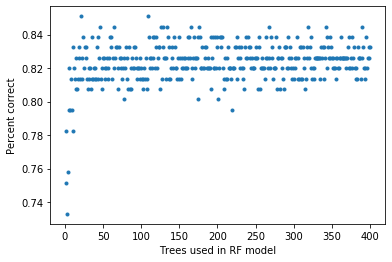

In [10]:
XX = np.zeros((tot,))
for i in range(tot):
    XX[i] = int(i)+1
plt.plot(XX, correct_percent, '.')
plt.ylabel('Percent correct')
plt.xlabel('Trees used in RF model')
#plt.savefig('RF_error3.pdf')